In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict

load_dotenv()

True

In [2]:
model = model = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

In [8]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [19]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']

    prompt = f"Create a detailed outline for a blog post titled: '{title}'"
    outline = model.invoke(prompt)

    state['outline'] = outline

    return state


def create_blog(state: BlogState) -> BlogState:
    outline = state['outline']
    title = state['title']

    prompt = f"Write a detailed blog post on the topic '{title}' using the following outline: {outline}."
    content = model.invoke(prompt)

    state['content'] = content

    return state

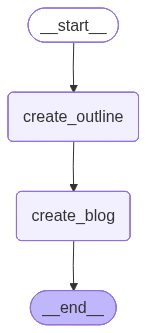

In [20]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)


workflow = graph.compile()
workflow

In [24]:
initial_state = {"title": "India"}

final_state = workflow.invoke(initial_state)
print(final_state['content'].content)


**Discover the Vibrant and Diverse Country of India**

India, a land of vibrant colors, rich history, and breathtaking natural beauty, is a country that has captivated the imagination of travelers and explorers for centuries. From the snow-capped Himalayas to the sun-kissed beaches of Goa, India is a country that offers a unique blend of ancient traditions, modern innovations, and diverse landscapes. In this blog post, we will delve into the fascinating world of India, exploring its geography, culture, history, economy, infrastructure, tourism, and travel.

**I. Introduction**

India, the seventh-largest country in the world, is located in South Asia and shares borders with Pakistan, China, Nepal, Bhutan, Bangladesh, and Myanmar. With a population of over 1.3 billion people, India is the second-most populous country in the world. The country has a rich cultural heritage, with a history dating back over 5,000 years. From the Indus Valley Civilization to the Mughal Empire, India has been

In [23]:
print(final_state['outline'].content)

Here's a detailed outline for a blog post on 'India':

**I. Introduction**

* A. Hook: Briefly introduce India as a vibrant and diverse country
* B. Background: Provide a brief history of India, its geographical location, and its cultural significance
* C. Thesis statement: India is a country that offers a unique blend of ancient traditions, modern innovations, and breathtaking natural beauty, making it a fascinating destination for travelers and a captivating subject for exploration.

**II. Geography and Climate**

* A. Overview: Describe India's geographical location, its borders, and its diverse landscape
* B. Climate: Explain the different climate zones in India, from tropical to alpine, and the impact of climate change on the country
* C. Natural features: Highlight some of India's most notable natural features, such as the Himalayas, the Ganges River, and the beaches of Goa

**III. Culture and History**

* A. Ancient civilizations: Discuss the Indus Valley Civilization, the Vedic